## Declination of the Sun

- obliquity of the ecliptic
$$
\epsilon_0 = 23.44 ^\circ
$$

- annual variation of the declination of the Sun
$$
\delta_{\odot} = -\arcsin \left[ \sin \epsilon_0 \cos \left( \frac{360 ^\circ}{365.24}(N + 10) \right) \right]
$$

- difference in days starting from 1st January $(0 \le N \le 364)$

In [1]:
import math

N = 171  # day of 1st solstice
omega = 2 * math.pi / 365.24  # angular velocity in rad/day
ecl = math.radians(23.44)  # obliquity of the ecliptic

# approximate expression for declination of the Sun
delta = -math.asin(math.sin(ecl)*math.cos(omega*(N+10)))
print("declination = {:.2f} deg".format(math.degrees(delta)))

declination = 23.43 deg


In [2]:
import numpy as np

# equinoxes and solstices in 2020
N = np.array([79, 171, 265, 355])

In [3]:
print(N)
print(N.size)
print(N.dtype)

[ 79 171 265 355]
4
int64


In [4]:
print(N[1])
print(N[-3])

171
171


In [5]:
delta = -np.arcsin(math.sin(ecl)*np.cos(omega*(N+10)))
print(np.degrees(delta))

[ -0.9055077   23.43035419  -0.41950731 -23.43978827]


In [6]:
tmp = N+10
print(tmp)
print(tmp.dtype)

tmp = omega*tmp
print(tmp)
print(tmp.dtype)

tmp = math.sin(ecl)*np.cos(tmp)
print(tmp)
print(tmp.dtype)

delta = -np.arcsin(tmp)
print(np.degrees(delta))

[ 89 181 275 365]
int64
[1.53105764 3.11372396 4.73079608 6.27905661]
float64
[ 0.01580343 -0.39763404  0.00732172  0.39778512]
float64
[ -0.9055077   23.43035419  -0.41950731 -23.43978827]


In [7]:
print("declination = {:.2f} deg".
      format(math.degrees(delta[1])))

declination = 23.43 deg


In [8]:
for val in delta: 
    print("declination = {:6.2f} deg".
          format(math.degrees(val)))

declination =  -0.91 deg
declination =  23.43 deg
declination =  -0.42 deg
declination = -23.44 deg


In [9]:
print("i day delta [deg]")
for i, val in enumerate(delta):
    print("{1:d} {2:3d} {0:8.2f}".\
          format(math.degrees(val), i, N[i]))

i day delta [deg]
0  79    -0.91
1 171    23.43
2 265    -0.42
3 355   -23.44


In [10]:
print("day delta [deg]")
for row in zip(N, delta):
    print("{0:3d} {1:8.2f}".
          format(row[0], math.degrees(row[1])))

day delta [deg]
 79    -0.91
171    23.43
265    -0.42
355   -23.44


## Diurnal Arc

- hour angle corresponding to the setting time

$$
\cos h_{\text{set}} = - \tan \delta \tan \phi
$$

where:
- $\delta$: declination of the object
- $\phi$: latitude of the observer's position on Earth

$T = 2 h_\text{set}$: length of the diurnal arc

In [11]:
from astropy.coordinates import SkyCoord, EarthLocation

betelgeuse = SkyCoord.from_name('Betelgeuse')
print(betelgeuse)

<SkyCoord (ICRS): (ra, dec) in deg
    (88.79293899, 7.40706399)>


In [12]:
delta = betelgeuse.dec
print(delta)

7d24m25.430382s


In [13]:
import astropy.units as u

obs = EarthLocation(lat=53*u.deg+28*u.arcmin+49*u.arcsec,
                    lon=10*u.deg+14*u.arcmin+23*u.arcsec)

phi = obs.lat

In [14]:
import math

h = math.acos(-math.tan(delta.radian) * math.tan(phi.radian))

In [15]:
T = (math.degrees(2*h)/360)*u.sday
print("T = {:.2f}".format(T.to(u.h)))

T = 13.31 h


In [16]:
import numpy as np

N = np.arange(365)
omega = 2*math.pi/365.24
ecl = math.radians(23.44)

delta = -np.arcsin(math.sin(ecl) * np.cos(omega*(N+10)))

`u.sday.to(u.h)`:  length of a sideral day in solar hours

In [17]:
h = np.arccos(-np.tan(delta) * math.tan(phi.radian))
T = (np.degrees(2*h)/360) * u.sday.to(u.h)

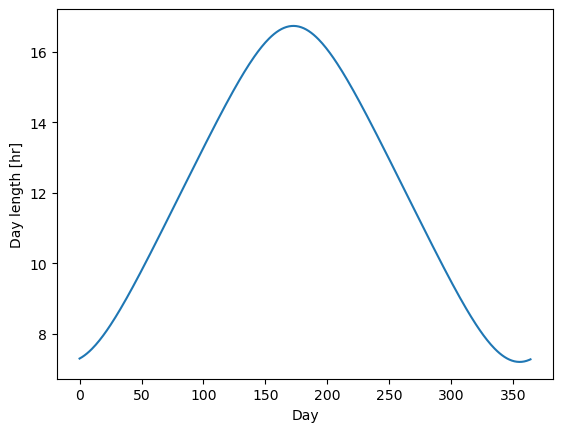

In [18]:
import matplotlib.pyplot as plt

plt.plot(N, T)
plt.xlabel("Day")
plt.ylabel("Day length [hr]")
plt.savefig("day_length.pdf")

In [19]:
print("Minimum day length = {:5.2f} h".format(T.min()))
print("Maximum day length = {:5.2f} h".format(T.max()))

Minimum day length =  7.20 h
Maximum day length = 16.73 h


Beyond the polar circles $(\phi=\pm 66^\circ 33^\prime)$, the day length varies between 0 and 24 h.

In [20]:
phi = math.radians(78+13/60)

h = np.arccos(-np.tan(delta)*math.tan(phi))
T = (np.degrees(2*h)/360) * u.sday.to(u.h)

/var/folders/d4/xhfvv5n927b6pg81whlh7qxr0000gn/T/ipykernel_14794/1939755857.py:3: RuntimeWarning: invalid value encountered in arccos
  h = np.arccos(-np.tan(delta)*math.tan(phi))


In [21]:
h[::100]

array([       nan, 2.22359552,        nan,        nan])

- polar night or polar day during which the Sun never rises or sets

In [22]:
tmp = np.clip(-np.tan(delta)*math.tan(phi), -1.0, 1.0)
h = np.arccos(tmp)
T = (np.degrees(2*h)/360) * u.sday.to(u.h)

In [23]:
h[::100]

array([0.        , 2.22359552, 3.14159265, 0.        ])

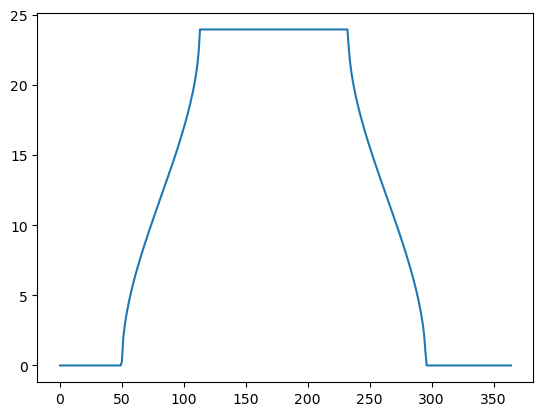

In [24]:
plt.plot(N, T);

In [25]:
phi = {
    'Hamburg'      : obs.lat.radian,
    'Longyearbyen' : math.radians(78 + 13/60),
}

In [26]:
print(phi['Hamburg'])

0.9334069321033784


In [27]:
phi['New York'] = math.radians(40 + 43/60)
phi['Bangkok'] = math.radians(13 + 45/60)

In [28]:
len(phi)

4

Hamburg: 53.48 deg
Longyearbyen: 78.22 deg
New York: 40.72 deg
Bangkok: 13.75 deg


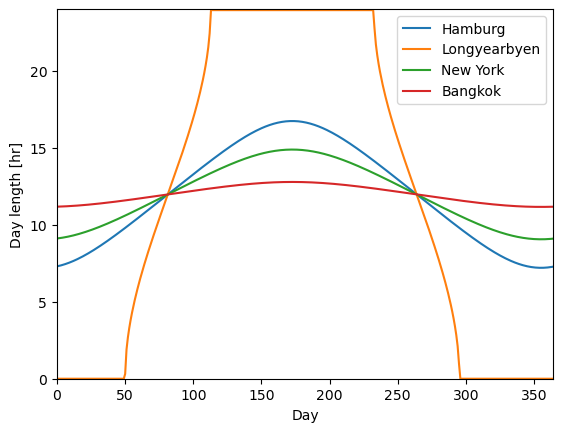

In [29]:
for key in phi:
    print(key + ": {:.2f} deg".format(math.degrees(phi[key])))

    h = np.arccos(np.clip(-np.tan(delta)*math.tan(phi[key]),
                          -1.0, 1.0))
    T = (np.degrees(2*h)/360) * u.sday.to(u.h)

    plt.plot(N, T, label=key)

plt.xlabel("Day")
plt.xlim(0, 364)
plt.ylabel("Day length [hr]")
plt.ylim(0, 24)
plt.legend(loc='upper right')
plt.savefig("daylength.pdf")

## Observation of Celestial Objects

In [30]:
import astropy.units as u
from astropy.coordinates import \
    SkyCoord, EarthLocation, AltAz, get_sun

obs = EarthLocation(lat=53*u.deg+28*u.arcmin+49*u.arcsec,
                    lon=10*u.deg+14*u.arcmin+23*u.arcsec)

phi = obs.lat

In [34]:
from astropy.time import Time

utc_shift = 2*u.hour  # CEST time zone (+2h)

noon_cest = Time("2020-07-31 12:00:00") - utc_shift
noon_cest  # UTC time corresponding to 12am CEST.

<Time object: scale='utc' format='iso' value=2020-07-31 10:00:00.000>

In [37]:
import numpy as np

# time array covering next 24 hours in steps of 5 min
elapsed = np.arange(0, 24*60, 5) * u.min
time = noon_cest + elapsed

# sequence of horizontal frames
frame_local_24h = AltAz(obstime=time, location=obs)

In [41]:
type(np.arange(0, 24*60, 5))

numpy.ndarray

In [42]:
type(elapsed)

astropy.units.quantity.Quantity

In [43]:
elapsed

<Quantity [   0.,    5.,   10.,   15.,   20.,   25.,   30.,   35.,   40.,
             45.,   50.,   55.,   60.,   65.,   70.,   75.,   80.,   85.,
             90.,   95.,  100.,  105.,  110.,  115.,  120.,  125.,  130.,
            135.,  140.,  145.,  150.,  155.,  160.,  165.,  170.,  175.,
            180.,  185.,  190.,  195.,  200.,  205.,  210.,  215.,  220.,
            225.,  230.,  235.,  240.,  245.,  250.,  255.,  260.,  265.,
            270.,  275.,  280.,  285.,  290.,  295.,  300.,  305.,  310.,
            315.,  320.,  325.,  330.,  335.,  340.,  345.,  350.,  355.,
            360.,  365.,  370.,  375.,  380.,  385.,  390.,  395.,  400.,
            405.,  410.,  415.,  420.,  425.,  430.,  435.,  440.,  445.,
            450.,  455.,  460.,  465.,  470.,  475.,  480.,  485.,  490.,
            495.,  500.,  505.,  510.,  515.,  520.,  525.,  530.,  535.,
            540.,  545.,  550.,  555.,  560.,  565.,  570.,  575.,  580.,
            585.,  590.,  595.,  600.,

In [40]:
isinstance(elapsed, u.quantity.Quantity)

True

In [39]:
isinstance(elapsed, np.ndarray)

True

In [45]:
isinstance(time, np.ndarray)

False

In [46]:
type(time)

astropy.time.core.Time

In [48]:
# star we want to observe
betelgeuse = SkyCoord.from_name('Betelgeuse')

betelgeuse_local = betelgeuse.transform_to(frame_local_24h)

In [51]:
# time-dependent coordinates of the Sun in equatorial system
sun = get_sun(time)

sun_local = sun.transform_to(frame_local_24h)

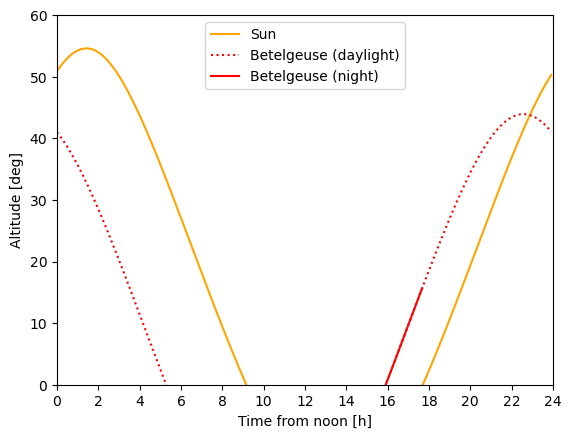

In [64]:
import matplotlib.pyplot as plt 

elapsed_night = elapsed[np.where(sun_local.alt < 0)]
betelgeuse_night = \
    betelgeuse_local[np.where(sun_local.alt < 0)]

plt.plot(elapsed.to(u.h), sun_local.alt,
         color='orange', label='Sun')
plt.plot(elapsed.to(u.h), betelgeuse_local.alt,
         color='red', linestyle=':',
         label='Betelgeuse (daylight)')
plt.plot(elapsed_night.to(u.h), betelgeuse_night.alt,
         color='red', label='Betelgeuse (night)')

plt.xlabel('Time from noon [h]')
plt.xlim(0, 24)
plt.xticks(np.arange(13)*2)
plt.ylabel('Altitude [deg]')
plt.ylim(0, 60)
plt.legend(loc='upper center')
plt.savefig("Betelgeuse_obs_window.pdf")